In [2]:
medical_charges_url = "https://raw.githubusercontent.com/JovianML/opendatasets/master/data/medical-charges.csv"

In [3]:
from urllib.request import urlretrieve
urlretrieve(medical_charges_url, 'medical.csv')

('medical.csv', <http.client.HTTPMessage at 0x114273740>)

In [4]:
import pandas as pd
medical_df = pd.read_csv('medical.csv')
medical_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [5]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [10]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
# setup for matplotlib and sns
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [22]:
# plotly can plot histogram and box plat together
fig = px.histogram(medical_df, 
                   x='charges', 
                   marginal='box', 
                   color='smoker',
                   nbins=47, 
                   title='Distribution of BMI')
fig.update_layout(bargap=0.1)
fig.show()

In [44]:
# scatter plot categorized by the type of smoker
fig = px.scatter(medical_df,
# fig = px.scatter(medical_df[medical_df.smoker=='no'], 
                 x='age', 
                 y='charges', 
                 color='smoker', 
                 opacity=0.8, 
                 hover_data=['sex'], 
                 title='Age vs. Charges')
fig.update_traces(marker_size=5)
fig.show()

In [31]:
# violin plot to see how data are distributed for each x which may be confusing wish scatter plot
fig = px.violin(medical_df, x='children', y='charges')
fig.show()

In [37]:
numeric_df = medical_df.select_dtypes(include=['number'])

In [38]:
# correlations among numeric attributes of dataset
numeric_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [35]:
medical_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


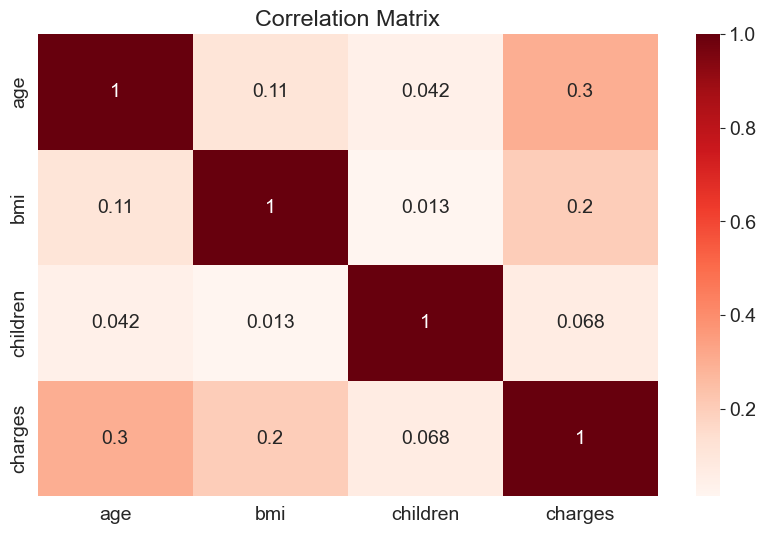

In [40]:
# heatmap of the correlations
sns.heatmap(numeric_df.corr(), cmap='Reds', annot=True)
plt.title('Correlation Matrix');

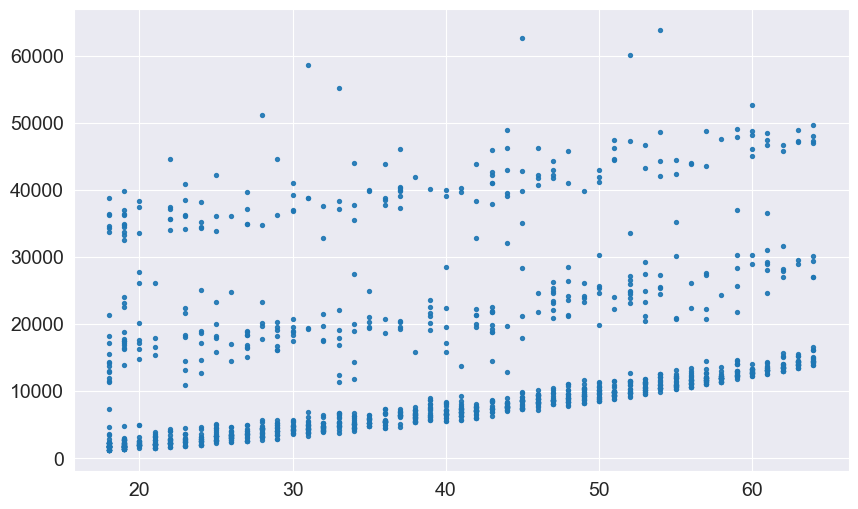

In [151]:
plt.scatter(medical_df.age, medical_df.charges, s=8,alpha=0.9);


## Let's predict the insurance premium for non-smoker

In [124]:
non_smoker_df = medical_df[medical_df.smoker == 'no']
ages = non_smoker_df.age

estimated_charges = estimate_charges(ages, 50,100)


In [125]:
# regression function y=mx+c
def estimate_charges(age, w,b):
    return w*age+b


# plotting scatter (actual) and line graph (predicted)
def try_parameters(w, b):
    ages = non_smoker_df.age
    target = non_smoker_df.charges
    
    estimated_charges = estimate_charges(ages, w, b)
    
    plt.plot(ages, estimated_charges, 'r', alpha=0.9);
    plt.scatter(ages, target, s=8,alpha=0.8);
    plt.xlabel('Age');
    plt.ylabel('Charges')
    plt.legend(['Estimate', 'Actual']);

In [128]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import SGDRegressor

In [85]:
# root mean squared error
def rmse(targets, predictions):
    return np.sqrt(np.mean(np.square(targets - predictions)))

In [171]:
inputs, targets = medical_df[['age','bmi','children']], medical_df.charges

# print(medical_df.charges)
# print(medical_df['charges'])
# print(medical_df[['charges']])
# # for model fit, X has to be 2D array, Y could be 1D or more dimension
# # print('inputs.shape :', inputs.shape)
# # print('target.shape :', targets.shape)
# # print(type(non_smoker_df))
# # print(type(targets))
# # print(type(inputs))

In [146]:
model = LinearRegression()
# model = SGDRegressor()
model.fit(inputs.values, targets.values)
# print(model.coef_, model.intercept_)
predictions = model.predict(inputs.values)
loss = rmse(targets, predictions)

print(f"Loss: {loss}")
print(f"Coefficient: {model.coef_}, Intercept: {model.intercept_}")

Loss: 11355.317901125973
Coefficient: [239.99447429 332.0833645  542.86465225], Intercept: -6916.243347787036


In [152]:
px.scatter(medical_df, x='age', y='charges', color='smoker')

## Dealing with Categorical variable like Smoker (binary)
$charges = w_1 \times age + w_2 \times bmi + w_3 \times children + w_4 \times smoker + w_5 \times gender + w_6 \times region + b$

### Coding categorical variables smoker, sex

In [162]:
smoker_code = {'no':0, 'yes': 1}
medical_df['smoker_code'] = medical_df.smoker.map(smoker_code)
medical_df.charges.corr(medical_df.smoker_code)

sex_code = {'female':0, 'male': 1}
medical_df['sex_code'] = medical_df.sex.map(sex_code)
medical_df.charges.corr(medical_df.sex_code)

np.float64(0.057292062202025366)

### One-hot encoder for regions (4 regions)

In [166]:
from sklearn import preprocessing
enc = preprocessing.OneHotEncoder()

In [176]:
enc.fit(medical_df[['region']])
# enc.categories_

one_hot = enc.transform(medical_df[['region']]).toarray()
one_hot

array([[0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.]])

In [174]:
medical_df[['northeast', 'northwest', 'southeast', 'southwest']] = one_hot
medical_df

,age,sex,bmi,children,smoker,region,charges,smoker_code,gender_code,sex_code,northeast,northwest,southeast,southwest
0,19,female,27.900,0,yes,southwest,16884.92400,1,0,0,0.0,0.0,0.0,1.0
1,18,male,33.770,1,no,southeast,1725.55230,0,1,1,0.0,0.0,1.0,0.0
2,28,male,33.000,3,no,southeast,4449.46200,0,1,1,0.0,0.0,1.0,0.0
3,33,male,22.705,0,no,northwest,21984.47061,0,1,1,0.0,1.0,0.0,0.0
4,32,male,28.880,0,no,northwest,3866.85520,0,1,1,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,0,1,1,0.0,1.0,0.0,0.0
1334,18,female,31.920,0,no,northeast,2205.98080,0,0,0,1.0,0.0,0.0,0.0
1335,18,female,36.850,0,no,southeast,1629.83350,0,0,0,0.0,0.0,1.0,0.0
1336,21,female,25.800,0,no,southwest,2007.94500,0,0,0,0.0,0.0,0.0,1.0


In [180]:
input_cols = ['age','bmi','children', 'smoker_code', 'sex_code', 'northeast']
inputs, targets = medical_df[['age','bmi','children', 'smoker_code', 'sex_code', 'northeast']], medical_df.charges

In [178]:
model = LinearRegression()
# model = SGDRegressor()
model.fit(inputs.values, targets.values)
# print(model.coef_, model.intercept_)
predictions = model.predict(inputs.values)
loss = rmse(targets, predictions)

print(f"Loss: {loss}")
print(f"Coefficient: {model.coef_}, Intercept: {model.intercept_}")

Loss: 6047.1830469152255
Coefficient: [  257.28820648   329.99475291   480.44992836 23820.40732565
  -131.67213891   774.65622475], Intercept: -12460.976838870483


In [181]:
weights_df = pd.DataFrame({
    'feature': np.append(input_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df

,feature,weight
0,age,257.288206
1,bmi,329.994753
2,children,480.449928
3,smoker_code,23820.407326
4,sex_code,-131.672139
5,northeast,774.656225
6,1,-12460.976839


### Standarized columns with different ranges (age, bmi and children)
Other columns have already values ranging from 0-1

In [188]:
from sklearn.preprocessing import StandardScaler

numeric_cols = ['age', 'bmi', 'children'] 
scaler = StandardScaler()
scaler.fit(medical_df[numeric_cols])
scaled_inputs = scaler.transform(medical_df[numeric_cols])


cat_cols = ['smoker_code', 'sex_code', 'northeast', 'northwest', 'southeast', 'southwest']
categorical_data = medical_df[cat_cols].values

StandardScaler()
[[-1.43876426 -0.45332    -0.90861367]
 [-1.50996545  0.5096211  -0.07876719]
 [-0.79795355  0.38330685  1.58092576]
 ...
 [-1.50996545  1.0148781  -0.90861367]
 [-1.29636188 -0.79781341 -0.90861367]
 [ 1.55168573 -0.26138796 -0.90861367]]


In [186]:
inputs = np.concatenate((scaled_inputs, categorical_data), axis=1)
targets = medical_df.charges

model = LinearRegression().fit(inputs, targets)

predictions = model.predict(inputs)

loss = rmse(targets, predictions)
print('Loss:', loss)

Loss: 6041.679651174452


In [187]:
weights_df = pd.DataFrame({
    'feature': np.append(numeric_cols + cat_cols, 1),
    'weight': np.append(model.coef_, model.intercept_)
})
weights_df.sort_values('weight', ascending=False)

,feature,weight
3,smoker_code,23848.534542
9,1,8466.483215
0,age,3607.472736
1,bmi,2067.691966
5,northeast,587.009235
2,children,572.998210
6,northwest,234.045336
4,sex_code,-131.314359
8,southwest,-373.041756
7,southeast,-448.012814


In [197]:
new_customer = [[28, 30, 2, 1, 0, 0, 1, 0, 0]]

numeric_values = np.array(new_customer)[:, :3]  # Extract the first three numeric columns
numeric_std = scaler.transform(numeric_values)
cat_values = np.array(new_customer)[:, 3:]  # Extract the categorical columns
new_customer_std = np.concatenate((numeric_std, cat_values), axis=1)
prediction = model.predict(new_customer_std)
print(prediction)
loss = rmse(targets, prediction)
print('Loss:', loss)

[29875.81463599]
Loss: 20549.49688638134


/opt/anaconda3/envs/ML-Scikit/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning:

X does not have valid feature names, but StandardScaler was fitted with feature names

